In [9]:
"""
决策树
"""
#获取sklearn上面的预测房价的数据
from sklearn.datasets.california_housing import fetch_california_housing
import pandas as pd

house_data_set = fetch_california_housing()
print(house_data_set.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [10]:
#分别获取特征值和标签值
x_data_set = house_data_set.data
y_data_set = house_data_set.target


In [11]:
#创建决策树
from sklearn import tree
dt = tree.DecisionTreeRegressor(max_depth = 3)
dt.fit(x_data_set,y_data_set)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [12]:
"""
画出决策树
"""
#要可视化显示 首先需要安装 graphviz   http://www.graphviz.org/Download..php
dot_data = \
    tree.export_graphviz(
        dt,
        out_file = None,
        feature_names = house_data_set.feature_names,
        filled = True,
        impurity = False,
        rounded = True
    )

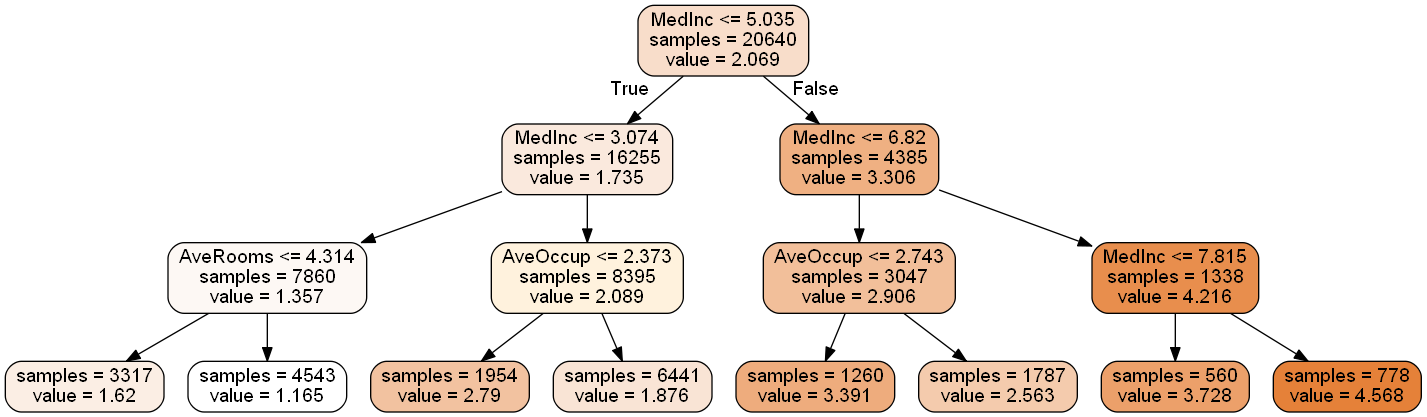

In [14]:
#pip install pydotplus
import pydotplus
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin'
graph = pydotplus.graph_from_dot_data(dot_data)
graph.get_nodes()[7].set_fillcolor("#FFF2DD")
from IPython.display import Image
Image(graph.create_png())

In [15]:
graph.write_png("house_decision_tree.png")

True

In [17]:
"""
使用普通的方式查看预测精度
"""
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_data_set,y_data_set,test_size=0.2)

dt.fit(x_train,y_train)
sc = dt.score(x_test,y_test)
print(sc)


0.5534495992648152


In [23]:
"""
使用随机森林的方式
"""
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 20)
rfr.fit(x_train,y_train)
rfr.score(x_test,y_test)

0.8083087624617744

In [36]:
"""
参数调整
"""
from sklearn.model_selection import  GridSearchCV
tree_param_list = { 'min_samples_split': list((3,6,9)),'n_estimators':list((10,50,100))}
grid = GridSearchCV(RandomForestRegressor(),param_grid=tree_param_list,cv = 5)
grid.fit(x_train,y_train)
grid.best_params_, grid.best_score_


({'min_samples_split': 3, 'n_estimators': 100}, 0.801295905562724)

In [44]:
"""
参数使用
"""
rfr = RandomForestRegressor(min_samples_split = 2,n_estimators = 200)
rfr.fit(x_train,y_train)
rfr.score(x_test,y_test)

0.8188664828380131

In [16]:
"""
使用交叉验证的方式
"""
from sklearn.model_selection import cross_val_score

acc = cross_val_score(dt,x_data_set,y_data_set, scoring=None,cv=10, n_jobs=1)
print(acc)


[ 0.55856849  0.37538677  0.405073    0.532058    0.54128915  0.48760107
 -0.16726225  0.2903457   0.23134304  0.36899576]
